In [61]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [62]:

def KC_LZ(string):
    n = len(string)
    s = '0'+string
    c = 1
    l = 1
    i = 0
    k = 1
    k_max = 1

    while True:
        if s[i+k] != s[l+k]:
            if k > k_max:
                k_max = k
            i += 1
            if i == l:
                c += 1
                l += k_max
                if l+1 > n:
                    break
                else:
                    i = 0
                    k = 1
                    k_max = 1
            else:
                k = 1
        else:
            k += 1
            if l+k > n:
                c += 1
                break
    # a la Lempel and Ziv (IEEE trans inf theory it-22, 75 (1976),
    # h(n)=c(n)/b(n) where c(n) is the kolmogorov complexity
    # and h(n) is a normalised measure of complexity.
    complexity = c
    # b=n*1.0/np.log2(n)
    # complexity=c/b;
    return complexity


In [63]:
def calc_KC(s):
    L = len(s)
    if s == '0'*L or s == '1'*L:
        return np.log2(L)
    else:
        return np.log2(L)*(KC_LZ(s)+KC_LZ(s[::-1]))/2.0

In [64]:
def round_int(x):
    if x in [float("-inf"),float("inf")]: return float("nan")
    return int(round(x))

In [65]:
def discretize(arr):
    return list(map(round,arr))

def to_bin(arr):
    return ''.join(list(map(str,arr)))

def f(x,r):
    return r * x * (1-x)

def logistic_map(x_0,r,iterations,epsilon=0,e_freq=0):
    assert r>0 
    assert r < 4
    res = [x_0]
    cur = x_0
    for i in range(iterations-1):
        cur = f(cur,r)

        # When kick occurs
        if np.random.rand() < e_freq:
            added_eps = np.random.uniform(-epsilon,epsilon)
            # Keep sampling for epsilon until we get a valid value
            while  0>= cur + added_eps or cur + added_eps>=1:
                added_eps = np.random.uniform(-epsilon,epsilon)
            cur += added_eps
        assert 0< cur <1
        res.append(cur)
    return res

In [66]:
SAMPLES = 10**5

def generate_patterns(iterations,epsilon=0,e_freq=0,r=-1):

    '''Return list of patterns  from random `r` and `x_0`. patterns are of length `iterations`
        If r parameter is provided it will use that as the initial value of r, otherwise it will be random.
    
    '''
    r_is_random = r == -1
    patterns = []
    for _ in range(SAMPLES):
        if (r_is_random):
            r= np.random.uniform(4)
        x_0 = np.random.rand()
        mapp = logistic_map(x_0,r,iterations,epsilon=epsilon,e_freq=e_freq)
        patterns.append(to_bin(discretize(mapp)) )
    return patterns


In [67]:
def generate_logistic(iterations,start_iteration=0,epsilon=0,e_frequency=0,r=-1):
    ''' Wrapper function for logicstic map generation with kick.

    Parameters:
        `iterations`: the number of iterations that will be taken into account, this will determine the length of the pattern.
        `start_iteration`: after what iteration to start observing the pattern. defaults to `0`.
        `epsilon`: The magnitude of the random kick applied, when 0.5 is passed, the kick will be between -0.5,0.5. default to 0
        `e_frequency`: Nonnegative number determining the frequency of the kick. defaults to 0.
                       If the number is in the range [0,1), this is a probability.
    '''
                       # Otherwise it represents the frequency of the kick (1 means every time, 2 means every two time [nokick,kick,nokick,kick]) NOT IMPLEMENTED
    patterns = generate_patterns(start_iteration+iterations,epsilon=epsilon,e_freq=e_frequency,r=r)
    patterns = [ pattern[start_iteration:] for pattern in patterns]
    return patterns

In [68]:
n_iterations = 25
start_iteration=1000
epsilon = 0.5
e_frequency = 0.1
r =3

In [69]:
# Measuring the slope
# highest probability for each complexity value np.polyfit
# start_iteration 0,1000

Measuring the slope
highest probability for each complexity value np.polyfit
start_iteration 0,1000
epsilon_freq = 1
epsilon = [0.01 .... 0.6]
r=1,2,3,3.5


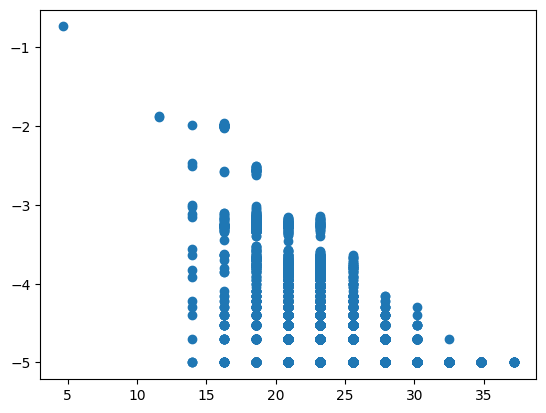

In [70]:
# Generate figure for each epsilon value
# %prun generate_logistic(n_iterations,start_iteration=1000,epsilon=epsilon,e_frequency=e_frequency,r=r)
patterns = generate_logistic(n_iterations,start_iteration=start_iteration,epsilon=epsilon,e_frequency=e_frequency,r=r)
counts = Counter(patterns)

probability = counts.copy()
probability = {k: v/SAMPLES for k,v in probability.items()}

probability_values =  list(probability.values())
complexities = list(map(calc_KC,probability.keys()))
plt.figure()
plt.scatter(complexities,np.log10(probability_values))
# # plt.savefig(f"fixed_r/{r}.png")